In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss,accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import DenseNet121

In [2]:
data_path = 'Data'

In [3]:
directory = 'Data/Train'
directory2 = 'Data/Test'

In [4]:
File=[]
for file in os.listdir(directory):
    File+=[file]
print(File)

['COVID19', 'NORMAL', 'PNEUMONIA']


In [5]:
dataset=[]
mapping={'COVID19':0, 'NORMAL':1, 'PNEUMONIA':2}
count=0

for file in os.listdir(directory):
    path=os.path.join(directory,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(150,150))
        image=img_to_array(image)
        image=image/255.0
        dataset.append([image,count])     
    count=count+1

In [6]:
testset=[]
mapping={'COVID19':0, 'NORMAL':1, 'PNEUMONIA':2 }
count=0

for file in os.listdir(directory2):
    path=os.path.join(directory2,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(150,150))
        image=img_to_array(image)
        image=image/255.0
        testset.append([image,count])         
    count=count+1

In [7]:
data,labels0=zip(*dataset)
test,testlabels0=zip(*testset)

In [8]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)
print(data.shape)
print(labels.shape)

(5144, 150, 150, 3)
(5144, 3)


In [9]:
testlabels1=to_categorical(testlabels0)
test=np.array(test)
testlabels=np.array(testlabels1)
print(test.shape)
print(testlabels.shape)

(1288, 150, 150, 3)
(1288, 3)


In [10]:
data2=data.reshape(-1,150,150,3)
test2=test.reshape(-1,150,150,3)

In [11]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [12]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(4115, 150, 150, 3)
(1029, 150, 150, 3)
(4115, 3)
(1029, 3)


In [13]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                    width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [14]:
pretrained_model3 = tf.keras.applications.DenseNet121(input_shape=(150,150,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False
for layer in pretrained_model3.layers:
    layer.trainable = False
print("Base Model loaded !")    
pretrained_model3.summary()

Base Model loaded !
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 75, 75, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________

__________________________________________________________________________________________________
conv3_block2_2_conv (Conv2D)    (None, 19, 19, 32)   36864       conv3_block2_1_relu[0][0]        
__________________________________________________________________________________________________
conv3_block2_concat (Concatenat (None, 19, 19, 192)  0           conv3_block1_concat[0][0]        
                                                                 conv3_block2_2_conv[0][0]        
__________________________________________________________________________________________________
conv3_block3_0_bn (BatchNormali (None, 19, 19, 192)  768         conv3_block2_concat[0][0]        
__________________________________________________________________________________________________
conv3_block3_0_relu (Activation (None, 19, 19, 192)  0           conv3_block3_0_bn[0][0]          
__________________________________________________________________________________________________
conv3_bloc

conv3_block8_concat (Concatenat (None, 19, 19, 384)  0           conv3_block7_concat[0][0]        
                                                                 conv3_block8_2_conv[0][0]        
__________________________________________________________________________________________________
conv3_block9_0_bn (BatchNormali (None, 19, 19, 384)  1536        conv3_block8_concat[0][0]        
__________________________________________________________________________________________________
conv3_block9_0_relu (Activation (None, 19, 19, 384)  0           conv3_block9_0_bn[0][0]          
__________________________________________________________________________________________________
conv3_block9_1_conv (Conv2D)    (None, 19, 19, 128)  49152       conv3_block9_0_relu[0][0]        
__________________________________________________________________________________________________
conv3_block9_1_bn (BatchNormali (None, 19, 19, 128)  512         conv3_block9_1_conv[0][0]        
__________

__________________________________________________________________________________________________
conv4_block8_1_bn (BatchNormali (None, 9, 9, 128)    512         conv4_block8_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block8_1_relu (Activation (None, 9, 9, 128)    0           conv4_block8_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block8_2_conv (Conv2D)    (None, 9, 9, 32)     36864       conv4_block8_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block8_concat (Concatenat (None, 9, 9, 512)    0           conv4_block7_concat[0][0]        
                                                                 conv4_block8_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_bloc

__________________________________________________________________________________________________
conv5_block3_0_bn (BatchNormali (None, 4, 4, 576)    2304        conv5_block2_concat[0][0]        
__________________________________________________________________________________________________
conv5_block3_0_relu (Activation (None, 4, 4, 576)    0           conv5_block3_0_bn[0][0]          
__________________________________________________________________________________________________
conv5_block3_1_conv (Conv2D)    (None, 4, 4, 128)    73728       conv5_block3_0_relu[0][0]        
__________________________________________________________________________________________________
conv5_block3_1_bn (BatchNormali (None, 4, 4, 128)    512         conv5_block3_1_conv[0][0]        
__________________________________________________________________________________________________
conv5_block3_1_relu (Activation (None, 4, 4, 128)    0           conv5_block3_1_bn[0][0]          
__________

conv5_block15_0_relu (Activatio (None, 4, 4, 960)    0           conv5_block15_0_bn[0][0]         
__________________________________________________________________________________________________
conv5_block15_1_conv (Conv2D)   (None, 4, 4, 128)    122880      conv5_block15_0_relu[0][0]       
__________________________________________________________________________________________________
conv5_block15_1_bn (BatchNormal (None, 4, 4, 128)    512         conv5_block15_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_block15_1_relu (Activatio (None, 4, 4, 128)    0           conv5_block15_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_block15_2_conv (Conv2D)   (None, 4, 4, 32)     36864       conv5_block15_1_relu[0][0]       
__________________________________________________________________________________________________
conv5_bloc

In [15]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(64, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(3, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 75, 75, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

__________________________________________________________________________________________________
conv3_block4_0_relu (Activation (None, 19, 19, 224)  0           conv3_block4_0_bn[0][0]          
__________________________________________________________________________________________________
conv3_block4_1_conv (Conv2D)    (None, 19, 19, 128)  28672       conv3_block4_0_relu[0][0]        
__________________________________________________________________________________________________
conv3_block4_1_bn (BatchNormali (None, 19, 19, 128)  512         conv3_block4_1_conv[0][0]        
__________________________________________________________________________________________________
conv3_block4_1_relu (Activation (None, 19, 19, 128)  0           conv3_block4_1_bn[0][0]          
__________________________________________________________________________________________________
conv3_block4_2_conv (Conv2D)    (None, 19, 19, 32)   36864       conv3_block4_1_relu[0][0]        
__________

conv3_block12_2_conv (Conv2D)   (None, 19, 19, 32)   36864       conv3_block12_1_relu[0][0]       
__________________________________________________________________________________________________
conv3_block12_concat (Concatena (None, 19, 19, 512)  0           conv3_block11_concat[0][0]       
                                                                 conv3_block12_2_conv[0][0]       
__________________________________________________________________________________________________
pool3_bn (BatchNormalization)   (None, 19, 19, 512)  2048        conv3_block12_concat[0][0]       
__________________________________________________________________________________________________
pool3_relu (Activation)         (None, 19, 19, 512)  0           pool3_bn[0][0]                   
__________________________________________________________________________________________________
pool3_conv (Conv2D)             (None, 19, 19, 256)  131072      pool3_relu[0][0]                 
__________

__________________________________________________________________________________________________
conv4_block9_1_bn (BatchNormali (None, 9, 9, 128)    512         conv4_block9_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block9_1_relu (Activation (None, 9, 9, 128)    0           conv4_block9_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block9_2_conv (Conv2D)    (None, 9, 9, 32)     36864       conv4_block9_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block9_concat (Concatenat (None, 9, 9, 544)    0           conv4_block8_concat[0][0]        
                                                                 conv4_block9_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_bloc

conv4_block20_1_conv (Conv2D)   (None, 9, 9, 128)    110592      conv4_block20_0_relu[0][0]       
__________________________________________________________________________________________________
conv4_block20_1_bn (BatchNormal (None, 9, 9, 128)    512         conv4_block20_1_conv[0][0]       
__________________________________________________________________________________________________
conv4_block20_1_relu (Activatio (None, 9, 9, 128)    0           conv4_block20_1_bn[0][0]         
__________________________________________________________________________________________________
conv4_block20_2_conv (Conv2D)   (None, 9, 9, 32)     36864       conv4_block20_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_block20_concat (Concatena (None, 9, 9, 896)    0           conv4_block19_concat[0][0]       
                                                                 conv4_block20_2_conv[0][0]       
__________

                                                                 conv5_block7_2_conv[0][0]        
__________________________________________________________________________________________________
conv5_block8_0_bn (BatchNormali (None, 4, 4, 736)    2944        conv5_block7_concat[0][0]        
__________________________________________________________________________________________________
conv5_block8_0_relu (Activation (None, 4, 4, 736)    0           conv5_block8_0_bn[0][0]          
__________________________________________________________________________________________________
conv5_block8_1_conv (Conv2D)    (None, 4, 4, 128)    94208       conv5_block8_0_relu[0][0]        
__________________________________________________________________________________________________
conv5_block8_1_bn (BatchNormali (None, 4, 4, 128)    512         conv5_block8_1_conv[0][0]        
__________________________________________________________________________________________________
conv5_bloc

relu (Activation)               (None, 4, 4, 1024)   0           bn[0][0]                         
__________________________________________________________________________________________________
avg_pool (GlobalAveragePooling2 (None, 1024)         0           relu[0][0]                       
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           65600       avg_pool[0][0]                   
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 3)            195         dense[0][0]                      
Total params: 7,103,299
Trainable params: 65,795
Non-trainable params: 7,037,504
__________________________________________________________________________________________________


In [16]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=16),validation_data=(testx,testy),epochs=50)

Epoch 1/50
258/258 [==============================] - 534s 2s/step - loss: 0.4079 - accuracy: 0.8345 - val_loss: 0.2817 - val_accuracy: 0.8863
Epoch 2/50
258/258 [==============================] - 521s 2s/step - loss: 0.2871 - accuracy: 0.8877 - val_loss: 0.3400 - val_accuracy: 0.8717
Epoch 3/50
258/258 [==============================] - 540s 2s/step - loss: 0.2611 - accuracy: 0.8984 - val_loss: 0.3875 - val_accuracy: 0.8474
Epoch 4/50
258/258 [==============================] - 492s 2s/step - loss: 0.2537 - accuracy: 0.8991 - val_loss: 0.2836 - val_accuracy: 0.8931
Epoch 5/50
258/258 [==============================] - 543s 2s/step - loss: 0.2454 - accuracy: 0.9035 - val_loss: 0.3589 - val_accuracy: 0.8552
Epoch 6/50
258/258 [==============================] - 433s 2s/step - loss: 0.2353 - accuracy: 0.9084 - val_loss: 0.2451 - val_accuracy: 0.9028
Epoch 7/50
258/258 [==============================] - 544s 2s/step - loss: 0.2172 - accuracy: 0.9145 - val_loss: 0.3756 - val_accuracy: 0.8455

In [17]:
model.evaluate(testx,testy,verbose=1)

33/33 [==============================] - 88s 3s/step - loss: 0.3596 - accuracy: 0.8591


[0.35963672399520874, 0.8590865135192871]

In [18]:
model.evaluate(trainx,trainy,verbose=1)

129/129 [==============================] - 349s 3s/step - loss: 0.3088 - accuracy: 0.8693


[0.30875107645988464, 0.8692588210105896]

In [19]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        99
           1       0.64      0.99      0.78       250
           2       0.99      0.80      0.89       680

    accuracy                           0.86      1029
   macro avg       0.87      0.90      0.87      1029
weighted avg       0.91      0.86      0.87      1029



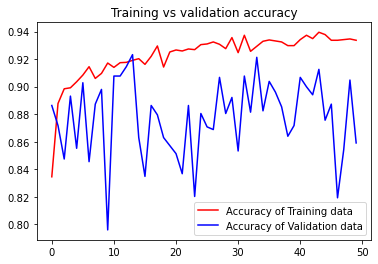

<Figure size 432x288 with 0 Axes>

In [20]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

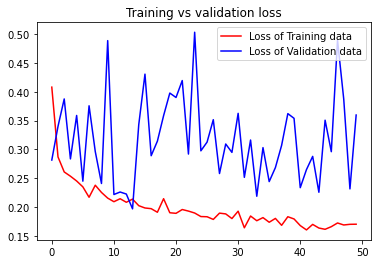

<Figure size 432x288 with 0 Axes>

In [21]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

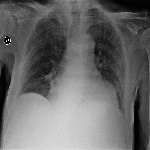

In [22]:
load_img("Data/test/COVID19/COVID19(461).jpg",target_size=(150,150))

In [23]:
image=load_img("Data/test/COVID19/COVID19(461).jpg",target_size=(150,150))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [24]:
reverse_mapping={0:'COVID19', 1:'NORMAL', 2:'PNEUMONIA'}

def mapper(value):
    return reverse_mapping[value]

prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is COVID19.


model.save("GR-DEN121100.h5")